In [1]:
import pandas as pd
import numpy as np

In [2]:
temp = pd.read_csv("D:/ML/Practical/ML Dataset/Obesity_Classification.csv")
print(temp.index)

RangeIndex(start=0, stop=108, step=1)


In [3]:
print(temp.columns)
print(temp.shape)
temp.info()

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')
(108, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [4]:
print(temp.head())

   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese


In [5]:
print(temp.tail())

      ID  Age  Gender  Height  Weight  BMI        Label
103  106   11    Male     175      10  3.9  Underweight
104  107   16  Female     160      10  3.9  Underweight
105  108   21    Male     180      15  5.6  Underweight
106  109   26  Female     150      15  5.6  Underweight
107  110   31    Male     190      20  8.3  Underweight


In [6]:
# to know unique values 
temp.nunique()

ID        108
Age        75
Gender      2
Height     10
Weight     23
BMI        25
Label       4
dtype: int64

In [7]:
temp.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [8]:
temp.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [9]:
print(temp.describe())

               ID         Age      Height      Weight         BMI
count  108.000000  108.000000  108.000000  108.000000  108.000000
mean    56.046296   46.555556  166.574074   59.490741   20.549074
std     31.917939   24.720620   27.873615   28.856233    7.583818
min      1.000000   11.000000  120.000000   10.000000    3.900000
25%     28.750000   27.000000  140.000000   35.000000   16.700000
50%     56.500000   42.500000  175.000000   55.000000   21.200000
75%     83.250000   59.250000  190.000000   85.000000   26.100000
max    110.000000  112.000000  210.000000  120.000000   37.200000


In [11]:
#Measure of central tendency
# print(temp.mean())
# print(temp.median())
# print(temp.mode())
print(temp['Height'].mean())
print(temp['Height'].median())
print(temp['Height'].mode())

166.57407407407408
175.0
0    160
1    175
2    180
3    190
Name: Height, dtype: int64


In [17]:
#Measure of Variability
print(temp['Height'].var())
print(temp['Height'].std())

# # mean (average) absolute deviation
# print(temp['Height'].mad())

#range
range1 = max(temp['Height'])-min(temp['Height'])
print(range1)

#IQR
Q1 = np.percentile(temp['Height'], 25)
Q3 = np.percentile(temp['Height'], 75)
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)

776.9383869851159
27.873614530324478
90
140.0 190.0
50.0


In [18]:
unique, counts = np.unique(temp['Height'], return_counts=True)
print(unique, counts)

[120 130 140 150 160 175 180 190 200 210] [ 9 10 10 11 12 12 12 12 10 10]


In [19]:
matrix = np.corrcoef(temp['Height'], temp['Weight'])
print(matrix)
print('\n\n')
print(temp[['Height', 'Weight']].corr())

[[1.         0.42888995]
 [0.42888995 1.        ]]



         Height   Weight
Height  1.00000  0.42889
Weight  0.42889  1.00000


In [26]:
data= temp.drop(temp.columns[[0, 2, 6]], axis=1)

In [27]:
matrix = data.corr()
print(matrix)

             Age    Height    Weight       BMI
Age     1.000000 -0.076896  0.465106  0.474185
Height -0.076896  1.000000  0.428890  0.354340
Weight  0.465106  0.428890  1.000000  0.972829
BMI     0.474185  0.354340  0.972829  1.000000


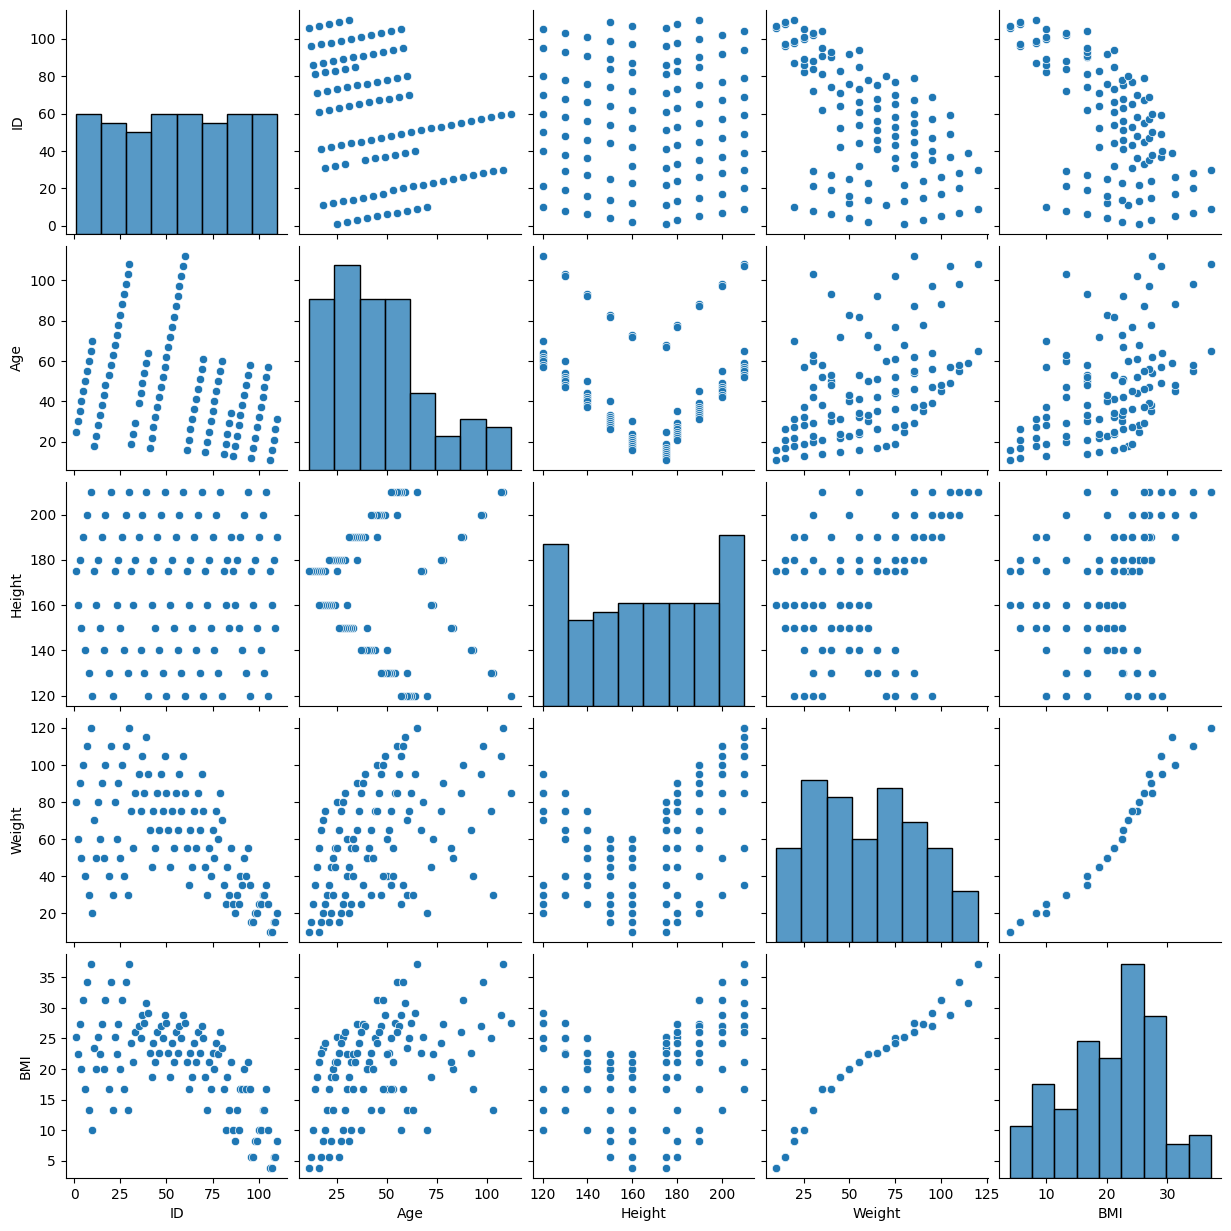

In [28]:
import seaborn as sns
sns.pairplot(temp)

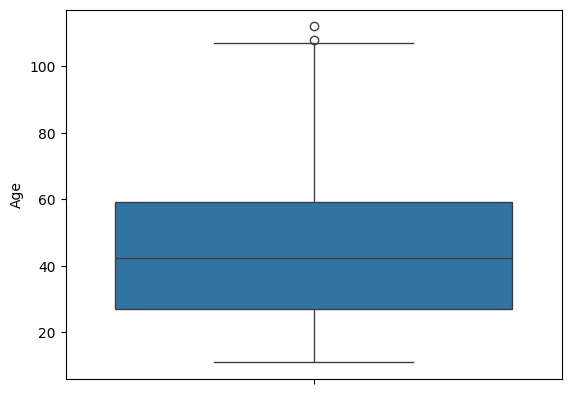

In [34]:
import matplotlib.pyplot as plt
bxplt = sns.boxplot(temp['Age'])
plt.show()

In [37]:
Q1 = np.percentile(temp['Age'], 25.) # 25th percentile of the data of the given feature
Q3 = np.percentile(temp['Age'], 75.) # 75th percentile of the data of the given feature
IQR = Q3-Q1 #Interquartile Range
#outlier_step = IQR * 1.5 #That's we were talking about above
#outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
ll = Q1 - (1.5*IQR)
ul = Q3 + (1.5*IQR)
upper_outliers = temp[temp['Age'] > ul].index.tolist()
lower_outliers = temp[temp['Age'] < ll].index.tolist()
bad_indices = list(set(upper_outliers + lower_outliers))
drop = True
#if not drop:
    #print('For the feature {}, No of Outliers is {}'.format(temp['sepal.width'], len(bad_indices)))
if drop:
    temp.drop(bad_indices, inplace = True, errors = 'ignore')
    print('Outliers from {} feature removed'.format(temp['Age']))

Outliers from 0      25
1      30
2      35
3      40
4      45
       ..
103    11
104    16
105    21
106    26
107    31
Name: Age, Length: 105, dtype: int64 feature removed


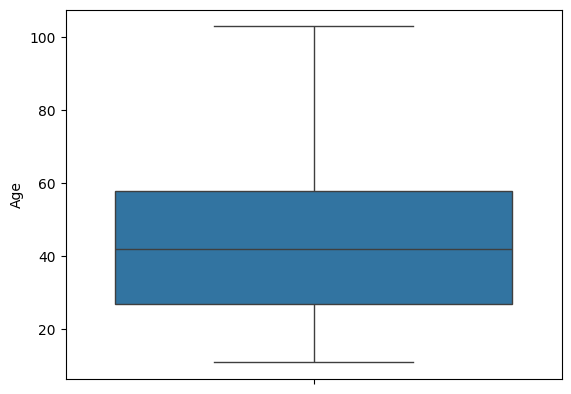

In [39]:
bxplt = sns.boxplot(temp['Age'])
plt.show()